# Peer-Graded Network Models

### Part (a)

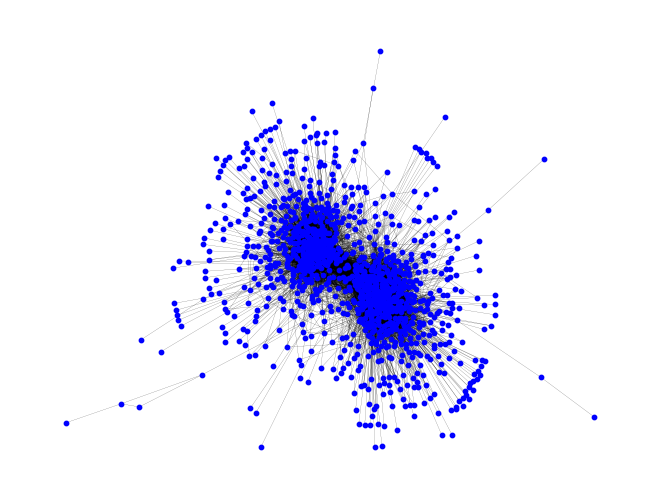

Number of nodes: 1222
Number of edges: 16713


In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings; warnings.filterwarnings('ignore')

np.random.seed(1)

# Read in and plot
G = nx.read_edgelist('PoliticalBlogs.txt')
nx.draw(G, with_labels=False, node_size=10, width = 0.1, node_color='blue')
plt.show()

# Get node and edge counts
node_count = G.number_of_nodes()
edge_count = G.number_of_edges()
print("Number of nodes:", node_count)
print("Number of edges:", edge_count)

There are 1,222 nodes and 16,713 edges.

### Part (b)

{0: 815, 1: 407}


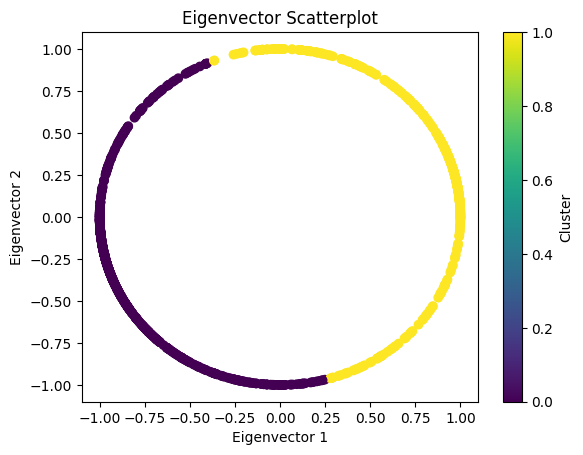

In [7]:
# Collect adjacency matrix and convert to numpy array
A = nx.adjacency_matrix(G).toarray()

# Perform spectral clustering
# Calculate the D and L matrices
D = np.squeeze(np.asarray(np.sum(A,axis = 1)))
L = np.diag(D**(-0.5)) @ A @ np.diag(D**(-0.5)) 

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Collect matrix Y and normalize
Y = eigenvectors[:,0:2]
Y = np.transpose(np.transpose(Y)/np.linalg.norm(Y,axis = 1))

# Perform K-Means on rows of Y and plot
kmeans = KMeans(n_clusters=2)
kmeans.fit(Y)
labels = kmeans.labels_
cluster_counts = {}
for label in labels:
    if label not in cluster_counts:
        cluster_counts[label] = 1
    else:
        cluster_counts[label] += 1

print(cluster_counts)

# Plot the scatterplot
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap='viridis')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.title('Eigenvector Scatterplot')
plt.colorbar(label='Cluster')
plt.show()